#### 

In [1]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('./data/03_농어의_길이_높이_두께_데이터.csv')
df.head(3)

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43


In [13]:
perch_full = np.array(df)
perch_full = df.to_numpy()
perch_full[:3]

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43]])

In [21]:
## 농어의 무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
target[:3]

array([ 5.9, 32. , 40. ])

In [22]:
perch_weight.shape,perch_full.shape

((56,), (56, 3))

In [18]:
from sklearn.model_selection import train_test_split

In [23]:
train_input, test_input, train_taregt, test_target = train_test_split(perch_full, perch_weight, test_size=0.3, random_state=42)

In [20]:
train_input.shape,test_input.shape, train_taregt.shape, test_target.shape

((39, 3), (17, 3), (39,), (17,))

#### 특성공학을 독립변수에 적용하여 특성(항목) 늘리기
#### 훈련데이터 특성공학 적용 변수명 : train_poly
#### 테스트데이터 특성공학 적용 변수명 : test_poly
#### - 패턴 조합을 찾을때는 훈련데이터를 이용한다
####  - 특성공학 생성 제어 : degree(기본값 2)

In [31]:
# 패키지 호출
from sklearn.preprocessing import PolynomialFeatures

In [35]:
# 클래스 생성 - y절편 제거
# 특성공학 항목 제어 : degree
poly = PolynomialFeatures(include_bias=False)

In [36]:
# 패턴 조합 찾기(훈련데이터)
# - 패턴 조합을 찾을때는 훈련데이터를 이용한다
poly.fit(train_input)

# 찾은 패턴 조합으로 훈련데이터 변환
train_poly = poly.transform(train_input)
# 찾은 패턴 조합으로 테스트데이터 변환
test_poly = poly.transform(test_input)

train_poly.shape, test_poly.shape


((39, 9), (17, 9))

In [37]:
# 특성의 패턴조합(계산) 확인하기(어떻게 계산이 이루어 졌는지 확인)
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

### 다중회귀 모델(Multiple Regression)
#### 독립변수가 여러개
#### 다중회귀모델의 공식
####  y = ax1 + bx2 + cx3 .....n + 절편

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()
lr

LinearRegression()

In [40]:
# 훈련
lr.fit(train_poly, train_taregt)

LinearRegression()

In [50]:
# 결과(정확도) 확인
print(lr.score(train_poly, train_taregt))
print(lr.score(test_poly, test_target))

0.9898271546307024
0.971377160062965


In [46]:
# 예측하기
lr_pred = lr.predict(test_poly)

In [44]:
from sklearn.metrics import r2_score

In [49]:
# r2_score(실제값, 예측값) 정확도 확인
r2_score(test_target, lr_pred)

0.971377160062965

### 특성의 갯수 늘리기


In [52]:
# degree을 이용해 특성 추가
poly = PolynomialFeatures(include_bias=False, degree=5)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape, test_poly.shape

((39, 55), (17, 55))

In [54]:
# 특성공학 항목 계산식 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

### 재 구성한 독립변수로 다중회귀 재훈련

In [59]:
lr.fit(train_poly, train_taregt)


LinearRegression()

In [63]:
## 훈련 정확도는 매우높아 졌지만 테스트 정확도는 오히려 낮아짐(과대적합)
print(lr.score(train_poly, train_taregt))
print(lr.score(test_poly, test_target))

0.9999999999999992
-20.195038576390044


### 해석
#### - 훈련의 결과로만 볼대는 매우 우수한 모델이나
#### - 테스트 결과는 매우 큰 과대적합이 발생함
#### - 따라서 degree 5로 했을때 보다 2로 했을 때 훈련 모델을 선택하는 것이 타당함
#### - 가끔은 훈련모델이 1에 가까울수록 테스트결과가 안 좋게 나오는 경우가 있음

## 규제 
### 규제 : 과대적합을 줄이는 방법으로 과대적합이 일어나지 않도록 제어하는 개념
#### - <span style = 'color:red'>계수(기울기)들의 값들의 크기를 줄이는 방법</span>으로 [규제]한다고 함
#### [ 규제 개념이 적용된 선형회귀 모델 ]
#### - 릿지(Ridge) , 라쏘(Lasso) 회귀 모델이 있음
#### - 주로 릿지방식을 선호하는 편임(보편적으로 과대적합 해소를 잘해줌)
####  [ 규제를 위해서는 ]
#### - <span style = 'color:red'>데이터의 정규화(표준화)작업이 선행</span>되어야 함
#### - 정규화(표준화) : 단위(값의 크기)가 다양한 특성들의 데이터를 지수형태로 데이터 범위로 변환
---
#### [ 정규화 ]
#### StandardScaler()
#### - 표준점수 생성 : fit()함수 사용 - 스스로 표준화할 값의 패턴 찾기
#### - 변환하기 : transform() - 찾은 패턴으로 데이터 변환
---
#### [ 규제 개념이 적용된 모델]
#### 릿지모델(Ridge)
#### - <span style = 'color:red'>계수(기울기)를 "제곱"한 값을 기준으로 규제를 적용</span>
#### - 사용패키지 :  linear_model.Ridge
#### - 훈련/평가/테스트 : fit(), score(), predict()

#### 라쏘모델(Lasso)
#### - <span style = 'color:red'>계수(기울기)를 "절대값"한 값을 기준으로 규제를 적용</span>
#### - 사용패키지 :  linear_model.Lasso
#### - 훈련/평가/테스트 : fit(), score(), predict()

---
### 정규화하기

In [64]:
from sklearn.preprocessing import StandardScaler

In [66]:
# 클래스 생성
std = StandardScaler()
std

StandardScaler()

In [68]:
# 정규화패턴 찾기
std.fit(train_poly)

#정규화 하기
train_scaled = std.transform(train_poly)
test_scaled = std.transform(test_poly)

In [72]:
train_scaled.shape, test_scaled.shape

((39, 55), (17, 55))

In [73]:
# 각 독립변수항목의 평균, 표준편차 확인하기

std.mean_ , std.scale_

(array([2.90871795e+01, 8.24512821e+00, 4.94307692e+00, 9.22189231e+02,
        2.64592436e+02, 1.58638718e+02, 7.62897179e+01, 4.57141154e+01,
        2.75046359e+01, 3.13859681e+04, 9.08934599e+03, 5.44671063e+03,
        2.64311561e+03, 1.58341599e+03, 9.52051059e+02, 7.71640873e+02,
        4.62216692e+02, 2.77893812e+02, 1.67689323e+02, 1.12772910e+06,
        3.28685226e+05, 1.96777006e+05, 9.61247987e+04, 5.75414118e+04,
        3.45600184e+04, 2.82046162e+04, 1.68839409e+04, 1.01414311e+04,
        6.11198139e+03, 8.30214542e+03, 4.97058311e+03, 2.98624024e+03,
        1.80023084e+03, 1.08894991e+03, 4.21524818e+07, 1.23342764e+07,
        7.37587706e+06, 3.61947635e+06, 2.16436604e+06, 1.29826472e+06,
        1.06509761e+06, 6.36948054e+05, 3.82114993e+05, 2.29954055e+05,
        3.14282071e+05, 1.87978037e+05, 1.12798128e+05, 6.79026129e+04,
        4.10060291e+04, 9.29855329e+04, 5.56311566e+04, 3.33936168e+04,
        2.01110834e+04, 1.21512827e+04, 7.36573011e+03]),
 array

### Ridge, Lasso 모델로 훈련하여 성능(과소/과대적합)을 일반화

In [74]:
from sklearn.linear_model import Ridge, Lasso

In [116]:
# 클래스 생성
lridge = Ridge()
llasso = Lasso()

In [117]:
# Ridge / Lasso훈련
lridge.fit(train_scaled, train_taregt)
llasso.fit(train_scaled, train_taregt)
lridge, llasso

(Ridge(), Lasso())

In [85]:
# Ridge 정확도
print('Ridge 훈련 : ',lridge.score(train_scaled, train_taregt))
print('Ridge 테스트 : ',lridge.score(test_scaled, test_target))
print('--------'*10)
print('Lasso 훈련 : ',llasso.score(train_scaled, train_taregt))
print('Lasso 테스트 : ',llasso.score(test_scaled, test_target))

Ridge 훈련 :  0.9889900259477936
Ridge 테스트 :  0.9806943210368351
--------------------------------------------------------------------------------
Lasso 훈련 :  0.9891841592343474
Lasso 테스트 :  0.9816966371762467


### 해석
#### - 훈련결과는 특성공학만을 적용했을때보다 낮게 나옴
#### - 하지만 테스트 결과는 높게 나옴
#### - 과소적합이 일어나지 않고 과대적합 또한 일어나지 않은 우수한 모델로 판단
---
### 규제강도 조절하기(정확도를 더욱 높일때) - 낮아질수도 있음
#### [ alpha 규제 강도 하이퍼파라미터 튜닝 ]
#### - <span style = 'color:red'>alpha값을 조정하여 훈련 정확도(결정계수)의 변화를 확인하여 가장 적합한 값을 선정</span>
####  [ alpha값 튜닝법 ] 
#### - 정해진 방법은 없으며 임의 범위의 값을 선정하여 반복하면서 찾음
#### - 훈련데이터 및 테스트데이터로 각각 임의 값을 적용하여 평가하여 결정계수 값을 이용하여 시각화함
#### - <span style = 'color:red'>훈련 및 테스트 정확도(결정계수)의 값이 가장 가까워지는 지점의 x축의 값을 alpha값으로 결정하여 사용하게 됨</span>
#### [ alpha값의 범위 ]
#### - <span style = 'color:red'>일반적으로 튜닝 시 사용하는 범위는 0.001, 0.01, 0.1, 1, 10, 100을 사용</span>
#### - 0.001부터 10배씩 늘려가면서 정확도(결정계수)를 확인하게 됨

In [87]:
# 시각화
import matplotlib.pyplot as plt
ll = [0.001, 0.01, 0.1, 1, 10, 100]
ll

[0.001, 0.01, 0.1, 1, 10, 100]

In [88]:
for i in ll:
    print(i)

0.001
0.01
0.1
1
10
100


alpha값 :  0.001  - Ridge 훈련 :  0.9926235997118728
alpha값 :  0.001  - Ridge 테스트 :  0.9604325805022764
훈련데이터와 테스트데이터 GAP :  0.03219
--------------------------------------------------------------------------------
alpha값 :  0.01  - Ridge 훈련 :  0.991274840867204
alpha값 :  0.01  - Ridge 테스트 :  0.9818749000851976
훈련데이터와 테스트데이터 GAP :  0.0094
--------------------------------------------------------------------------------
alpha값 :  0.1  - Ridge 훈련 :  0.9897983159614502
alpha값 :  0.1  - Ridge 테스트 :  0.9842243738800763
훈련데이터와 테스트데이터 GAP :  0.00557
--------------------------------------------------------------------------------
alpha값 :  1  - Ridge 훈련 :  0.9889900259477936
alpha값 :  1  - Ridge 테스트 :  0.9806943210368351
훈련데이터와 테스트데이터 GAP :  0.0083
--------------------------------------------------------------------------------
alpha값 :  10  - Ridge 훈련 :  0.9880568799300236
alpha값 :  10  - Ridge 테스트 :  0.9743695604464329
훈련데이터와 테스트데이터 GAP :  0.01369
-------------------------------------------------

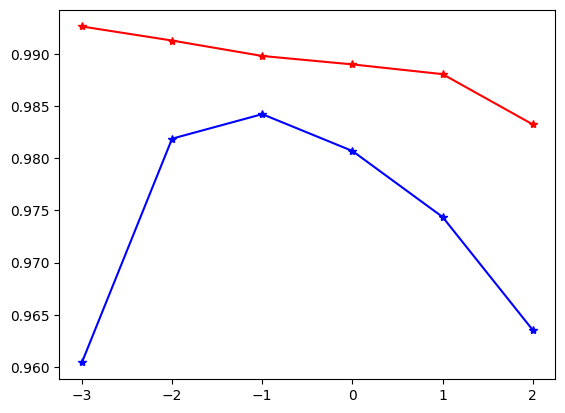

In [115]:
train_score = []
test_score = []
for i in ll:
    lridge = Ridge(alpha = i)
    lridge.fit(train_scaled, train_taregt)
    tr_sc = lridge.score(train_scaled, train_taregt)
    te_sc = lridge.score(test_scaled, test_target)
    train_score.append(tr_sc)
    test_score.append(te_sc)
    print('alpha값 : ', i, ' - Ridge 훈련 : ',tr_sc)
    print('alpha값 : ', i, ' - Ridge 테스트 : ',te_sc)
    print('훈련데이터와 테스트데이터 GAP : ',round(tr_sc - te_sc,5) )
    print('--------'*10)

plt.plot(np.log10(ll), train_score, label = 'train_data', c='red', marker='*')    
plt.plot(np.log10(ll), test_score, label = 'test_data', c='blue', marker='*')    
plt.show()

In [106]:
np.log10(10000)

4.0

#### 시각화에서 훈련과 테스트의 정확도를 이용해서 과소적합이 일어나지 않는 지점중에
#### 두거리가 가장 가까운 지점을 선택해서 채택하면 됨

In [120]:
# Ridge모델에 alpha 0.1를 적용하여 훈련
lridge = Ridge(alpha = 0.1)
lridge

Ridge(alpha=0.1)

In [121]:
lridge.fit(train_scaled, train_taregt)
tr_sc = lridge.score(train_scaled, train_taregt)
te_sc = lridge.score(test_scaled, test_target)
print('Ridge 훈련 : ',lridge.score(train_scaled, train_taregt))
print('Ridge 테스트 : ',lridge.score(test_scaled, test_target))

Ridge 훈련 :  0.9897983159614502
Ridge 테스트 :  0.9842243738800763


### Lasso모델 사용해서 성능 비교

alpha값 :  0.001  - Lasso 훈련 :  0.9903418168463881
alpha값 :  0.001  - Lasso 테스트 :  0.9851251560422752
훈련데이터와 테스트데이터 GAP :  0.00522
--------------------------------------------------------------------------------
alpha값 :  0.01  - Lasso 훈련 :  0.9902724616158107
alpha값 :  0.01  - Lasso 테스트 :  0.9851212595659263
훈련데이터와 테스트데이터 GAP :  0.00515
--------------------------------------------------------------------------------
alpha값 :  0.1  - Lasso 훈련 :  0.9895965271248277
alpha값 :  0.1  - Lasso 테스트 :  0.983774638583602
훈련데이터와 테스트데이터 GAP :  0.00582
--------------------------------------------------------------------------------
alpha값 :  1  - Lasso 훈련 :  0.9891841592343474
alpha값 :  1  - Lasso 테스트 :  0.9816966371762467
훈련데이터와 테스트데이터 GAP :  0.00749
--------------------------------------------------------------------------------
alpha값 :  10  - Lasso 훈련 :  0.9882059522438204
alpha값 :  10  - Lasso 테스트 :  0.9834044009315154
훈련데이터와 테스트데이터 GAP :  0.0048
------------------------------------------------

C:\anaconda3\envs\sj_prj\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.329e+04, tolerance: 4.887e+02
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\envs\sj_prj\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.037e+04, tolerance: 4.887e+02
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\envs\sj_prj\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.369e+02, toleranc

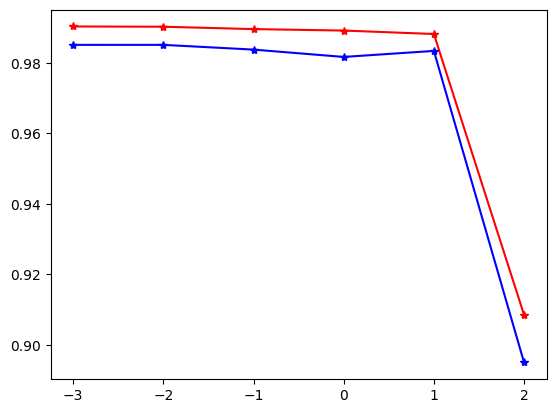

In [123]:
# llasso = Lasso()
train_score = []
test_score = []
for i in ll:
    llasso = Lasso(alpha = i)
    llasso.fit(train_scaled, train_taregt)
    tr_sc = llasso.score(train_scaled, train_taregt)
    te_sc = llasso.score(test_scaled, test_target)
    train_score.append(tr_sc)
    test_score.append(te_sc)
    print('alpha값 : ', i, ' - Lasso 훈련 : ',tr_sc)
    print('alpha값 : ', i, ' - Lasso 테스트 : ',te_sc)
    print('훈련데이터와 테스트데이터 GAP : ',round(tr_sc - te_sc,5) )
    print('--------'*10)

plt.plot(np.log10(ll), train_score, label = 'train_data', c='red', marker='*')    
plt.plot(np.log10(ll), test_score, label = 'test_data', c='blue', marker='*')    
plt.show()

In [124]:
# Ridge모델에 alpha 0.1를 적용하여 훈련
llasso = Lasso(alpha = 10)
llasso.fit(train_scaled, train_taregt)
tr_sc = llasso.score(train_scaled, train_taregt)
te_sc = llasso.score(test_scaled, test_target)
print('Lasso 훈련 : ',llasso.score(train_scaled, train_taregt))
print('Lasso 테스트 : ',llasso.score(test_scaled, test_target))

Lasso 훈련 :  0.9882059522438204
Lasso 테스트 :  0.9834044009315154


In [126]:
print('Lasso 훈련 : ',llasso.score(train_scaled, train_taregt))
print('Lasso 테스트 : ',llasso.score(test_scaled, test_target))
print('----------' * 10)
print('Ridge 훈련 : ',lridge.score(train_scaled, train_taregt))
print('Ridge 테스트 : ',lridge.score(test_scaled, test_target))
las_tr = llasso.score(train_scaled, train_taregt)
las_te = llasso.score(test_scaled, test_target)
rdg_tr = lridge.score(train_scaled, train_taregt)
rdg_te = lridge.score(test_scaled, test_target)


Lasso 훈련 :  0.9882059522438204
Lasso 테스트 :  0.9834044009315154
----------------------------------------------------------------------------------------------------
Ridge 훈련 :  0.9897983159614502
Ridge 테스트 :  0.9842243738800763


### <span style = 'color:red'>성능이 가장 좋았던 Lasso, Ridge의 alpha값으로 훈련해 본바 Ridge모델이 근소하게 성능이 좋음</span>
#### [ 튜닝시 시각화 해석 방법 ]
#### - 훈련곡선이 테스트곡선보다 위에 있어야 과소적합이 없는것임
#### - 급격하게 떨어지는 시점 이전에 가까운 지점을 찾는다
#### - 각각의 지점의 차이값을 비교해서 가장 낮은 값의 지점을 선택
#### - 같은 차이값을 보인다면 정확도가 높은 알파값을 결정하면 됨

<BarContainer object of 2 artists>

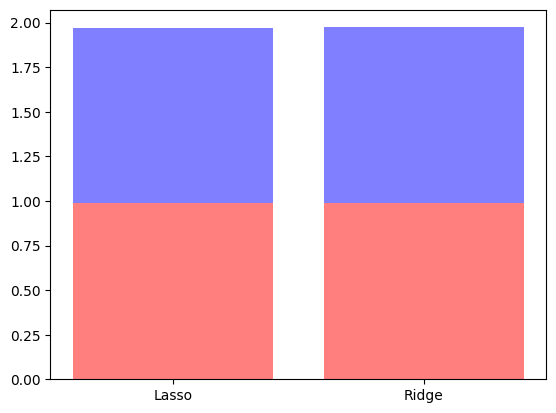

In [138]:
x = ['Lasso','Ridge']
y1 = [0.9882059522438204,0.9897983159614502]
y2 = [0.9834044009315154,0.9842243738800763]
plt.bar(x ,y1,color='red',alpha=0.5)
plt.bar(x ,y2,color='blue',alpha=0.5, bottom=y1)

### 선형, 릿지, 라쏘 모델 복습

In [137]:
ddf = pd.read_csv('./data/04_(문제)_회귀모델_drinking_water.csv')
ddf

,친밀도,적절성,만족도
0,3,4,3
1,3,3,2
2,4,4,4
3,2,2,2
4,2,2,2
...,...,...,...
259,3,4,4
260,3,4,3
261,4,4,4
262,4,4,4


In [ ]:
# 